# Exercise 12. Multiselective tests 
## Michal Béreš, Martina Litschmannová, Adéla Vrtková

## Test data for a function call example
 


In [ ]:
# I will produce frame data with one column from give
a = as.data.frame(rnorm(n = 35, mean = 107, sd = 10))
b = as.data.frame(rnorm(n = 30, mean = 105, sd = 10))
c = as.data.frame(rnorm(n = 40, mean = 102, sd = 10))
d = as.data.frame(rnorm(n = 32, mean = 101, sd = 10))

# I will rename the column name
colnames(a) = c("hodnota")
colnames(b) = c("hodnota")
colnames(c) = c("hodnota")
colnames(d) = c("hodnota")

# I will add a type for all frame data
a$typ = "a"
b$typ = "b"
c$typ = "c"
d$typ = "d"

# I glue the lines together
data = rbind(a,b,c,d)
# Convert type to type factor
data$typ = as.factor(data$typ)

head(data)

In [ ]:
boxplot(data$hodnota ~ data$typ)
# if there are any OPs, I will ignore them
# I know the data is from a normal distribution!)
# I also know they have the same variance)


# Overview of functions
 
## Variability measures
 
### Bartlett test
 
- verifies the agreement of variances
 
- $H_0: \sigma^2_1 = \sigma^2_2 = \sigma^2_3 = \ldots$
 
- $H_A: \neg H_0$
 
- the precondition is data normality(and of course independence and continuity)
 


In [ ]:
bartlett.test(data$hodnota ~ data$typ)

### Levene's test
 
- verifies the agreement of variances
 
- $H_0: \sigma^2_1 = \sigma^2_2 = \sigma^2_3 = \ldots$
 
- $H_A: \neg H_0$
 
- only independence and continuity are required
 


In [ ]:
car::leveneTest(data$hodnota ~ data$typ)

### Cochran's and Hartley's test
 
- also verify the agreement of variances
 
- require data normality and so-called balanced sorting
 
- balanced sorting means that we have approximately the same amount of data in each group
 
- we will not use them
 
## Position measures
 
### ANOVA(analysis of variance)
 
- verifies position matching(mean values)
 
- $H_0: \mu_1 = \mu_2 = \mu_3 = \ldots$
 
- $H_A: \neg H_0$
 
- prerequisites:
 
- normality dat
 
- homoskedasticity(identical variances)
 
-(and of course independence and continuity)
 
- if we reject $H_0$ Post-Hoc analysis is required
 
- using TukeyHSD test
 


In [ ]:
# Basic ANOVA
# H0: mu1=mu2=mu3=mu4
# HA:~H0(H0 negation)

res = aov(data$hodnota ~ data$typ)
summary(res)

In [ ]:
# Post-Hoc analysis

TukeyHSD(res)

In [ ]:
# effect counting
library(dplyr)

# overall average
prumer_vsech = mean(data$hodnota)
prumer_vsech

# averages in groups
efekty = data %>% group_by(typ) %>% 
    summarize(mean_skup = mean(hodnota))

# effects
efekty$efekt = efekty$mean_skup - prumer_vsech

# list sorted
efekty %>% arrange(desc(efekt))

### Kruskal - Wallis test
 
- verifies position match(medians)
 
- $H_0: X_{0.5,1} = X_{0.5,2} = X_{0.5,3} = \ldots$
 
- $H_A: \neg H_0$
 
- prerequisites:
 
- data symmetry
 
-(and of course independence and continuity)
 
- if we reject $H_0$ Post-Hoc analysis is required
 
- using the Dunn test/method
 


In [ ]:
# Basic KW test
# H0: X0.5,1=X0.5,2=X0.5,3=X0.5,4
# HA:~H0(H0 negation)

kruskal.test(data$hodnota ~ data$typ)

In [ ]:
# Post-Hoc analysis

# altP=T sets the p-value so that when making a decision
# on statistical significance compared to alpha
# default: altp=FALSE, then compare with alpha/2)

# install.packages("dunn.test")

dunn.test::dunn.test(x = data$hodnota, g = data$typ,
          method = "bonferroni", altp = TRUE)

In [ ]:
# effect counting

# total median
median_vsech = median(data$hodnota)
median_vsech

# medians in groups
efekty = data %>% group_by(typ) %>% 
    summarize(median_skup = median(hodnota))

# effects
efekty$efekt = efekty$median_skup - median_vsech

# list sorted
efekty %>% arrange(desc(efekt))

# Examples
 
## Example 1.
 
We test the null hypothesis µ1=µ2=µ3. It was found that the data we have available are selections from the normal distribution that satisfy the assumption of homoskedasticity(agreement of variances). Based on the data obtained by the exploratory analysis, complete the ANOVA table and the resulting conclusions. [!
 


In [ ]:
n = c(40,40,42)          # selection ranges
prum = c(300,290,310)    # averages in individual groups/classes
s = c(33,34,31)          # direction. deviations in individual groups/classes


In [ ]:
n.total = sum(n)         # total range of selections
k = 3                    # number of classes
df.b = k-1               # number of degrees of freedom - intergroup
df.e = n.total-k         # number of degrees of freedom - residual


In [ ]:
# overall average(using weighted average)
prum.total = weighted.mean(x = prum, w = n)
prum.total

In [ ]:
# intergroup sum of squares
ss.b = sum(n*(prum - prum.total)^2)
ss.b

In [ ]:
# residual sum of squares
ss.e = sum((n - 1)*s^2)
ss.e 

In [ ]:
# total squares
ss.b + ss.e

In [ ]:
# variance between groups/classes
ms.b = ss.b/df.b
ms.b

In [ ]:
# variance within groups/classes
ms.e = ss.e/df.e
ms.e

In [ ]:
# F-ratio
F = ms.b/ms.e
F

In [ ]:
# p-value
p = 1 - pf(F,df.b,df.e)
p

# At the significance level of 0.05, we reject the hypothesis of agreement of the mean values
# ie the mean values of at least one pair of groups become. significantly different.


In [ ]:
# group effects estimates
efekt = prum - prum.total
efekt

# Compared to the overall average, group 2 shows the most below-average results
# about 10 units lower than the overall average). On the contrary, the average of group 3 is
# about 10 units higher than the overall average. Average results of group 1
# correspond to the overall average.


## Example 2.
 
122 patients who underwent heart surgery were randomly divided into three groups
 
**Group 1:** Patients received 50% nitrous oxide and 50% oxygen mixed continuously for 24 hours.<br>
 
**Group 2:** Patients received 50% nitric oxide and 50% oxygen only during surgery.<br>
 
**Group 3:** Patients received no nitrous oxide but received 35-50% oxygen for 24 hours.<br>
 
The data in the folic acid.xls file correspond to the folic acid salt concentrations in the red blood cells in all three groups after 24 hours of ventilation. Verify that the observed differences between the folic acid salt concentrations are statistically significant, ie that there is an effect of the composition of the mixture on the monitored parameter.
 


In [ ]:
kysel = readxl::read_excel("data/testy_vicevyberove.xlsx", sheet=1)
colnames(kysel) = c("sk1","sk2","sk3")   # rename columns
kysel

In [ ]:
# conversion to standard data format
kysel.s = stack(kysel)
colnames(kysel.s) = c("hodnoty","skupina")
kysel.s = na.omit(kysel.s)
head(kysel.s)

In [ ]:
boxplot(kysel.s$hodnoty ~ kysel.s$skupina)
# Data do not contain remote observations.


In [ ]:
# we test the normality using S.-W. test
library(dplyr)

kysel.s %>% group_by(skupina) %>% 
    summarise(norm.pval = shapiro.test(hodnoty)$p.value)

In [ ]:
# Information needed to set rounding

kysel.s %>% group_by(skupina) %>% 
    summarise(len = length(hodnoty), st.dev = sd(hodnoty))

# sd is rounded to 3 valid digits
# sd and position measures are rounded to tenths


In [ ]:
# Verification of variance agreement
s2 = kysel.s %>% group_by(skupina) %>% 
        summarise(var = sd(hodnoty)^2)
s2 # sampling variances

max(s2$var)/min(s2$var)
# According to the box chart and information on the ratio of the largest and smallest
# variances(<2) we do not assume that the variances differ statistically significantly


In [ ]:
# The presumption of normality was not rejected ->Bartlett's test
bartlett.test(kysel.s$hodnoty ~ kysel.s$skupina)

# At the significance level of 0.05, the assumption of agreement of variances cannot be rejected
# Bartlett test, x_OBS=0.878, df=2, p-value=0.645).


In [ ]:
# We want to compare the mean values of independent samples from normal distributions
# with same variances ->ANOVA
# The aov() command requires data in the standard data format

vysledky = aov(kysel.s$hodnoty ~ kysel.s$skupina) 
summary(vysledky)  

# At the significance level of 0.05, we reject the hypothesis of agreement of the mean values
# ANOVA, p-value<<0.001) ->multiple comparison


In [ ]:
# post-hoc analysis
TukeyHSD(vysledky)

In [ ]:
# effect counting
library(dplyr)

# overall average
prumer_vsech = mean(kysel.s$hodnoty)
prumer_vsech

# averages in groups
efekty = kysel.s %>% group_by(skupina) %>% 
    summarize(mean_skup = mean(hodnoty))

# effects
efekty$efekt = efekty$mean_skup - prumer_vsech

# list sorted
efekty %>% arrange(desc(efekt))

# If we consider a high folic acid content to be positive, then statistically
# Group 1 patients achieved significantly best results(average content
# folic acid about 27 units higher than av. folic acid content in the blood
# all patients tested) and statistically significantly worst results
# achieved by patients from group 2(average folic acid content by about 26 units
# lower than the average content of folic acid in the blood of all tested patients).
# Folic acid content in the blood of group 3 patients
# corresponds to the overall average. All three groups of patients are according to each other
# Folic acid content in the blood statistically significantly different.


## Example 3.
 
Three breeds of rabbits are bred on the farm. An experiment was performed on kralici.xls, the aim of which was to find out whether, even if we keep and fatten all rabbits for the same time and under the same conditions, there is a statistically significant(conclusive) difference between breeds in rabbit weights. Verify.
 


In [ ]:
kralici = readxl::read_excel("data/testy_vicevyberove.xlsx", sheet=2)
colnames(kralici) = c("viden","cesky","kalif")   # rename columns
kralici

In [ ]:
# conversion to standard data format
kralici.s = stack(kralici)
colnames(kralici.s) = c("hodnoty","skupina")
kralici.s = na.omit(kralici.s)
head(kralici.s)

In [ ]:
boxplot(kralici.s$hodnoty ~ kralici.s$skupina)
# data contains OP


In [ ]:
# Eliminate remote observation
pom = boxplot(kralici.s$hodnoty ~ kralici.s$skupina, plot = FALSE)
pom$out

kralici.s$hodnoty.bez = kralici.s$hodnoty
kralici.s$hodnoty.bez[kralici.s$hodnoty.bez %in% pom$out]=NA

# Box chart
boxplot(kralici.s$hodnoty.bez ~ kralici.s$skupina)

In [ ]:
library(dplyr)

kralici.s %>% group_by(skupina) %>% 
    summarise(norm.pval = shapiro.test(hodnoty.bez)$p.value)

# At the significance level of 0.05, we do not reject the assumption of normality.


In [ ]:
# Information needed to set rounding
kralici.s %>% group_by(skupina) %>%
    summarize(len = sum(!is.nan(hodnoty.bez)), 
              sd = sd(hodnoty.bez, na.rm = TRUE))

# sd is rounded to 2 valid digits
# sd and position measurements zaok. to hundredths(unification across species of rabbits)


In [ ]:
# Variation compliance verification
s2 = kralici.s %>% group_by(skupina) %>%
        summarize(var = sd(hodnoty.bez, na.rm = TRUE)^2)
s2

max(s2$var)/min(s2$var)
# According to the box chart and information on the ratio of the largest and smallest dispersion.
# close to 2, but selection range<30) it is more difficult to estimate whether it is possible
# assume variance agreement. The test will help us decide.


In [ ]:
# The presumption of normality was not rejected ->Bartlett's test
bartlett.test(kralici.s$hodnoty.bez ~ kralici.s$skupina) 

# At the significance level of 0.05, the assumption of agreement of variances cannot be rejected
# Bartlett test, x_OBS=3.1, df=2, p-value=0.217).


In [ ]:
# We want to compare the mean values of independent samples from normal ones
# distributions with same variances ->ANOVA
# The aov() command requires data in the standard data format

vysledky = aov(kralici.s$hodnoty.bez ~ kralici.s$skupina)
summary(vysledky)  

# At the significance level of 0.05, we reject the hypothesis of agreement of the mean values
# p-value<<0.001, ANOVA) ->multiple comparison


In [ ]:
# post-hoc analysis
TukeyHSD(vysledky)

In [ ]:
# effect counting
library(dplyr)

# overall average
prumer_vsech = mean(kralici.s$hodnoty.bez, na.rm = TRUE)
prumer_vsech

# averages in groups
efekty = kralici.s %>% group_by(skupina) %>% 
    summarize(mean_skup = mean(hodnoty.bez, na.rm = TRUE))

# effects
efekty$efekt = efekty$mean_skup - prumer_vsech

# list sorted
efekty %>% arrange(desc(efekt))

## Example 4.
 
Four manufacturers A, B, C, D sent a total of 66 products to the competition for the best product quality. The jury compiled the order(only the order of the product from best to worst), which is listed in the file quality.xls. On the basis of the above data, assess whether the origin of the products affects its quality.
 


In [ ]:
jakost.s = readxl::read_excel("data/testy_vicevyberove.xlsx", sheet = 3)
colnames(jakost.s) = c("poradi", "skupina")   # rename columns
head(jakost.s)
# data is already in standard format


In [ ]:
boxplot(jakost.s$poradi ~ jakost.s$skupina)

# Verification of normality does not make sense - by nature it is a dis. data-order


In [ ]:
# Information needed to set rounding
jakost.s %>% group_by(skupina) %>%
    summarize(len = length(poradi), 
              sd = sd(poradi))

# sd is rounded to 2 valid digits
# sd and position measures are rounded to integers


In [ ]:
# Variation compliance verification
s2 = jakost.s %>% group_by(skupina) %>% summarize(var = sd(poradi)^2)
s2

max(s2$var)/min(s2$var)
# According to the box chart and information on the ratio of the largest and smallest
# variances(<2) from assuming variance agreement.
# Kruskal - Wallis test has more test power if the data is homosc.)


In [ ]:
# This is "serial" data, it makes no sense to consider the assumption of standards.
# ->Levene's test
car::leveneTest(jakost.s$poradi ~ jakost.s$skupina) 
# At the significance level of 0.05, the assumption of agreement of variances cannot be rejected
# Leven's test, x_OBS=0.4, df_num=3, df_denom=62, p-value=0.750)


In [ ]:
# Symmetry verification

jakost.s %>% group_by(skupina) %>% 
    summarize(sikmost = moments::skewness(poradi),
              test.pval = lawstat::symmetry.test(poradi,boot=FALSE)$p.value)

In [ ]:
# We want to compare the medians of independent samples ->Kruskal-Wallis test
kruskal.test(jakost.s$poradi ~ jakost.s$skupina)

# At the significance level of 0.05, the median agreement hypothesis cannot be rejected
# Kruskal-Wallis test, x_OBS=3.7, df=3, p-value=0.295).
# Ie. statistically significant differences between producers(in terms of rank
# products in competition) do not exist.


## Example 5.
 
The effect of three slides on blood clotting was studied. In addition to other indicators, the so-called thrombin time was determined. Data on 42 monitored persons are recorded in the file trombin.xls. Does the size of the thrombin time depend on which preparation was used?
 


In [ ]:
trombin.s = readxl::read_excel("data/testy_vicevyberove.xlsx", 
                               sheet=4, skip = 1)
colnames(trombin.s) = c("hodnoty","skupina")   # rename columns

head(trombin.s)
# data is already in standard format


In [ ]:
# exploratory analysis - verification of OP
boxplot(trombin.s$hodnoty ~ trombin.s$skupina)
# does not contain OP


In [ ]:
# verification of normality
library(dplyr)

trombin.s %>% group_by(skupina) %>%
    summarize(norm.pval = shapiro.test(hodnoty)$p.value)

# At the significance level of 0.05 we reject the assumption of normality(for Ačka)


In [ ]:
# Information needed to set up rounding

trombin.s %>% group_by(skupina) %>%
    summarize(len = length(hodnoty), stdev = sd(hodnoty))

# sd is rounded to 2 valid digits
# sd and position measures are rounded to hundredths(unification across groups)


In [ ]:
# Verification of variance agreement(not necessary - we have to use KW anyway)
s2 = trombin.s %>% group_by(skupina) %>%
        summarize(var = sd(hodnoty)^2)
s2

max(s2$var)/min(s2$var)
# According to the box chart and information on the ratio of the largest and the smallest
# variances(>>2) cannot match variances.


In [ ]:
# The presumption of normality was rejected ->Levene's test

# thrombin.s $ group=as.factor(trombin.s $ group)

car::leveneTest(trombin.s$hodnoty ~ trombin.s$skupina) 

# the presumption of homoskedasticity was rejected


In [ ]:
# Symmetry verification
trombin.s %>% group_by(skupina) %>% 
  summarize(sikmost = moments::skewness(hodnoty),
            test.pval = lawstat::symmetry.test(hodnoty, boot=FALSE)$p.value)
# we do not reject the assumption of data symmetry


In [ ]:
# We want to compare medians than. selections that do not have standards. distribution
# ->Kruskal - Wallis test

kruskal.test(trombin.s$hodnoty,trombin.s$skupina)
# At the significance level of 0.05, we reject the hypothesis of a median agreement
# Ie. thrombin time is statistically significant
# affected by the preparation. ->multiple comparisons


In [ ]:
# altP=T sets the p-value so that when making a decision
# on statistical significance compared to alpha
# default: altp=FALSE, then compare with alpha/2)

dunn.test::dunn.test(trombin.s$hodnoty,trombin.s$skupina,
          method = "bonferroni", altp = TRUE)      

In [ ]:
# effect counting
library(dplyr)

# overall average
median_vsech = median(trombin.s$hodnoty)
median_vsech

# averages in groups
efekty = trombin.s %>% group_by(skupina) %>% 
    summarize(median_skup = median(hodnoty))

# effects
efekty$efekt = efekty$median_skup - median_vsech

# List sorted
efekty %>% arrange(desc(efekt))

## Example 6.(multiple groups)
 
When Snow White got to the seven dwarves, she sensed an opportunity to make a lot of money. The Dwarves basically beat the Snow White's hand and immediately handed over all the mined gold to it. However, even this is not enough for Snow White and she feels that she could benefit more from dwarves. Therefore, she began to record how many kilograms of gold a day she received from each of the dwarves(snehurka.xlsx). Verify that the dwarves differ in the amount of gold mined, if so, to form a homogeneous group in terms of gold mined.
 


In [1]:
zlato = readxl::read_excel("data/snehurka.xlsx")
head(zlato)
# data is in standard data format


hodnota,typ
<dbl>,<chr>
0.8892697,Profa
1.5882393,Profa
2.0176732,Profa
1.2511435,Profa
2.1443305,Profa
1.2500689,Profa


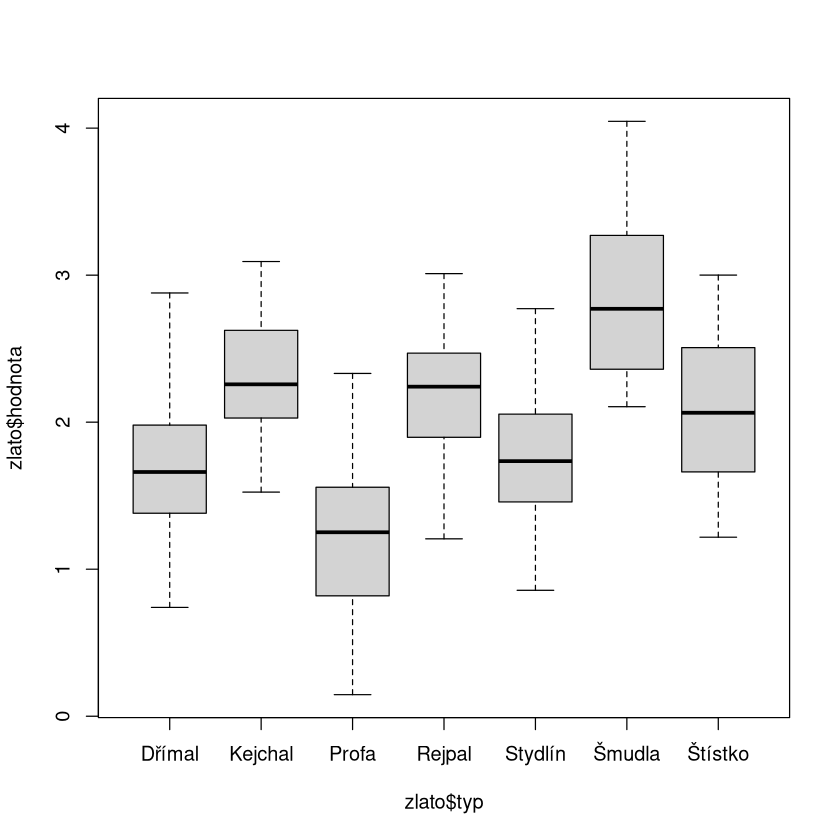

In [2]:
boxplot(zlato$hodnota ~ zlato$typ)
# data does not contain OP


In [3]:
# verification of normality
library(dplyr)

zlato %>% group_by(typ) %>%
    summarize(p.hodnota = shapiro.test(hodnota)$p.value)

# At the significance level of 0.05, we do not reject the assumption of normality



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,typ,p.hodnota
,<chr>,<dbl>
1,Dřímal,0.8295308
2,Kejchal,0.8162545
3,Profa,0.8265843
4,Rejpal,0.6555333
5,Stydlín,0.9177484
6,Šmudla,0.1177217
7,Štístko,0.1866139


In [4]:
# The presumption of normality was not rejected ->Bartlett's test
bartlett.test(zlato$hodnota ~ zlato$typ) 

# At the significance level of 0.05, the assumption of agreement of variances cannot be rejected



	Bartlett test of homogeneity of variances

data:  zlato$hodnota by zlato$typ
Bartlett's K-squared = 5.1736, df = 6, p-value = 0.5217


In [5]:
# ANOVA
vysledky = aov(zlato$hodnota ~ zlato$typ) 
summary(vysledky)  
# We reject the presumption of conformity
# ->there are stat. significant differences in mean values


             Df Sum Sq Mean Sq F value Pr(>F)    
zlato$typ     6  50.71   8.451   35.87 <2e-16 ***
Residuals   210  49.47   0.236                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [6]:
# POST-HOC
res = TukeyHSD(vysledky)[[1]]
res

,diff,lwr,upr,p adj
Kejchal-Dřímal,0.61338486,0.24635938,0.98041034,2.769364e-05
Profa-Dřímal,-0.45472230,-0.82174778,-0.08769682,5.265389e-03
Rejpal-Dřímal,0.54761573,0.18059025,0.91464121,2.871456e-04
Stydlín-Dřímal,0.09891331,-0.26811217,0.46593879,9.845413e-01
Šmudla-Dřímal,1.18016854,0.81314306,1.54719402,2.609024e-14
Štístko-Dřímal,0.42198262,0.05495714,0.78900810,1.296949e-02
Profa-Kejchal,-1.06810716,-1.43513263,-0.70108168,5.551115e-14
Rejpal-Kejchal,-0.06576913,-0.43279460,0.30125635,9.983200e-01
Stydlín-Kejchal,-0.51447155,-0.88149703,-0.14744607,8.575061e-04
Šmudla-Kejchal,0.56678368,0.19975820,0.93380916,1.485215e-04


In [7]:
# effect counting
library(dplyr)

# overall average
prumer_vsech = mean(zlato$hodnota)
prumer_vsech

# averages in groups
efekty = zlato %>% group_by(typ) %>% 
    summarize(mean_skup = mean(hodnota))

# effects
efekty$efekt = efekty$mean_skup - prumer_vsech

# list sorted
efekty.s = efekty %>% arrange(desc(efekt))
efekty.s

[1] 2.013667

typ,mean_skup,efekt
<chr>,<dbl>,<dbl>
Šmudla,2.849930,0.83626243
Kejchal,2.283146,0.26947875
Rejpal,2.217377,0.20370962
Štístko,2.091744,0.07807651
Stydlín,1.768674,-0.24499280
Dřímal,1.669761,-0.34390611
Profa,1.215039,-0.79862841
